<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Construct-the-problem" data-toc-modified-id="Construct-the-problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Construct the problem</a></span></li></ul></div>

In [4]:
from amod_ed.result_analysis import plot_cost_all_path
import cvxpy as cp
from amod_ed.helpers_icu import BPR_int

In [13]:
from amod_ed.helpers_icu import BPR

In [15]:
import matplotlib.pyplot as plt

In [27]:
phi_p = [1, 1]
phi_inv = [1, 1]
k_p = [7, 7]
k_inv = [4, 4]
shift_inv = [5, 5]
edges = ["1-2", "2-1"]

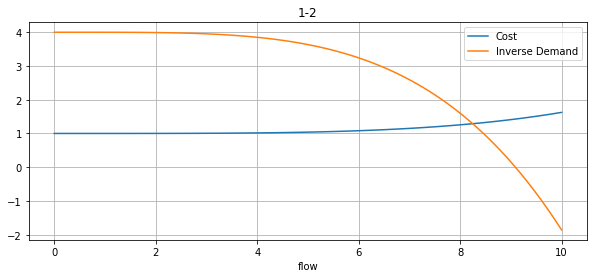

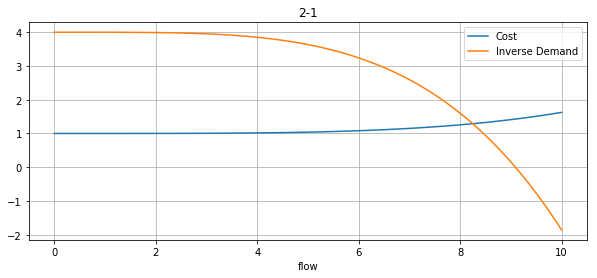

In [29]:
#plot paths for both directions
x = np.linspace(0, 10, 100)
for i in range(2):
    plt.figure(figsize= (10, 4))
    cost = BPR(phi_p[i], x, k_p[i])
    inv_d = -BPR(phi_inv[i], x, k_inv[i]) + shift_inv[i]
    plt.plot(x, cost, label = 'Cost')
    plt.plot(x, inv_d, label = 'Inverse Demand')
    plt.grid()
    plt.xlabel("flow")
    plt.legend()
    plt.title(edges[i])

## Construct the problem

In [5]:
f_p = cp.Variable(2)
f_r = cp.Variable(2)

r = cp.Parameter()

In [39]:
constraints = [f_p>=0, f_r>=0, r == f_r[1]-f_r[0]]

In [40]:
total_cost = 0
for i in range(2):
    cost = BPR_int(phi_p[i], f_p[i]+f_r[i], k_p[i])
    inv_d = -BPR_int(phi_inv[i], f_p[i], k_inv[i]) + shift_inv[i]*f_p[i]
    total_cost = total_cost + cost - inv_d

In [41]:
obj = cp.Minimize(total_cost)

In [42]:
prob = cp.Problem(obj, constraints)

In [44]:
r.value = 0

In [55]:
result = prob.solve(solver = cp.GUROBI)

In [56]:
f_p.value

array([8.24784625, 8.24813502])

In [57]:
f_r.value

array([9.68230956e-08, 9.68230956e-08])

todo: 
- Generate couples of random samples and compute the distance and then show that it is experimentally constractive